<a href="https://colab.research.google.com/github/MonicaaY/MonicaaY/blob/main/Virtual_Personal_Stylist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


train_data = pd.read_csv('/content/fashion-mnist_train.csv')
test_data = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
#Separating training and testing labels:
train_labels = train_data['label'].values
test_labels = test_data['label'].values
#Separating and normalizing training and testing pixels:
train_images = train_data.drop('label', axis=1).values / 255.0
test_images = test_data.drop('label', axis=1).values / 255.0
#Image-size:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [ ]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Epoch 1/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.8618 - accuracy: 0.7325 - val_loss: 0.5832 - val_accuracy: 0.8349
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.6624 - accuracy: 0.8058 - val_loss: 0.5201 - val_accuracy: 0.8664
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.6239 - accuracy: 0.8250 - val_loss: 0.4857 - val_accuracy: 0.8725
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.5948 - accuracy: 0.8357 - val_loss: 0.4628 - val_accuracy: 0.8820
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.5812 - accuracy: 0.8418 - val_loss: 0.4496 - val_accuracy: 0.8864
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.5702 - accuracy: 0.8465 - val_loss: 0.4526 - val_accuracy: 0.8851
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.5625 - accuracy: 0.8493 - val_loss: 0.4488 -

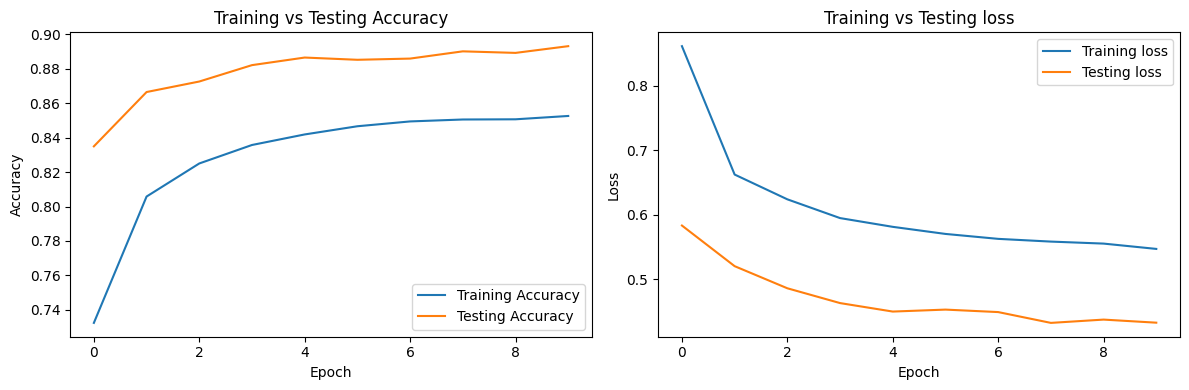

In [ ]:
#Creating the model:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                  kernel_regularizer=regularizers.l2(0.001)), # L2 Regularization
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)), # L2 Regularization
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout

    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization
    layers.Dropout(0.5),  # Dropout
    layers.Dense(10, activation='softmax')
])
#Compiling the model:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Early stop settings:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Training the model and getting the `history` object:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])
# Graph training and validation accuracy:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Graph training and validation loss:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Testing loss')
plt.title('Training vs Testing loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 [==============================] - 4s 13ms/step


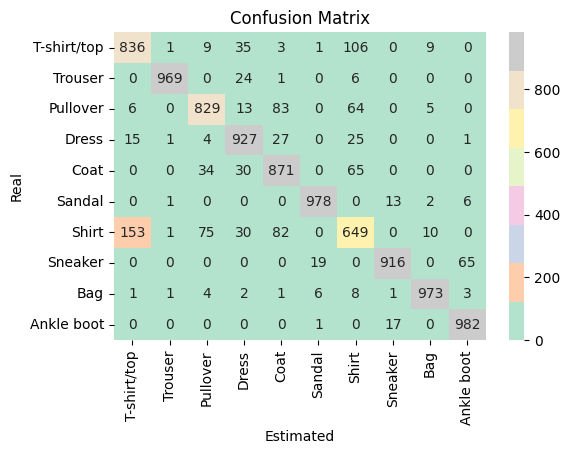

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Fashion-MNIST dataset class names:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#Predictions:
predictions = model.predict(test_images)
predicted_labels = predictions.argmax(axis=1)
#Creating Confusion Matrix:
conf_matrix = confusion_matrix(test_labels, predicted_labels)
#Visualization:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel2', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Estimated')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

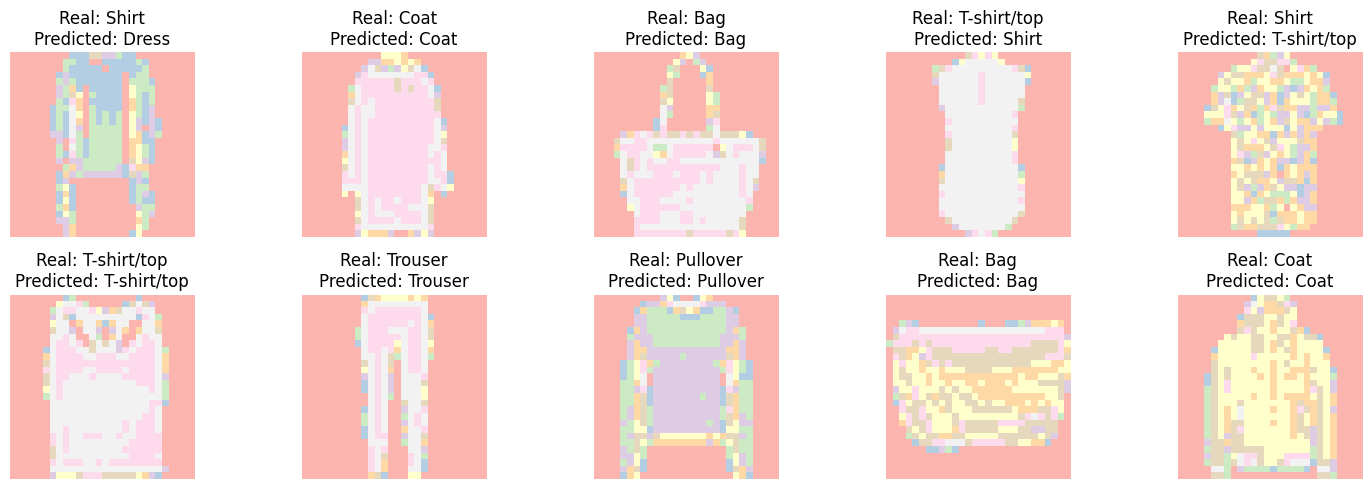

In [ ]:
# Selecting some random images from the test set:
num_samples = 10
random_indices = np.random.choice(test_images.shape[0], num_samples, replace=False)

plt.figure(figsize=(15, 5))
for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='Pastel1')
    plt.title(f'Real: {class_names[test_labels[index]]}\nPredicted: {class_names[predicted_labels[index]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

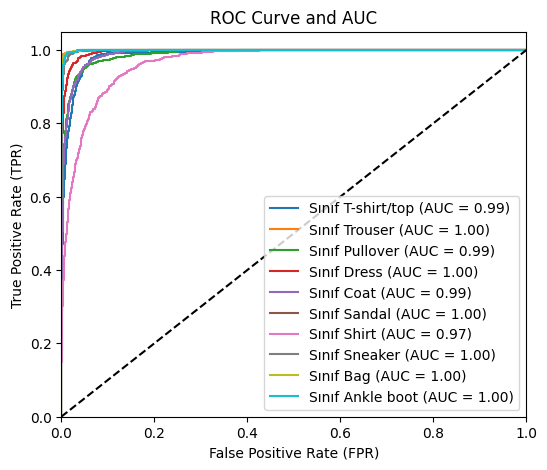

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
#Binarizing test tags:
binarized_labels = label_binarize(test_labels, classes=list(range(10)))
# Calculating ROC curve and AUC:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(binarized_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve for each class:
plt.figure(figsize=(6, 5))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Sınıf {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve and AUC')
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 36ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


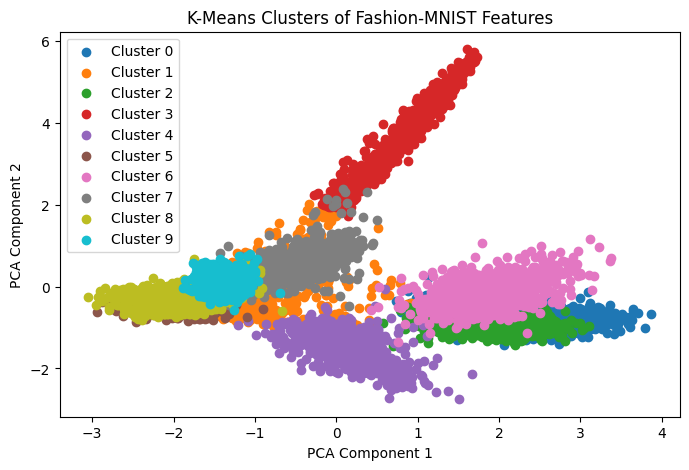

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
features = np.vstack([feature_extractor.predict(test_images[i:i+128]) for i in range(0, len(test_images), 128)])

#K-Means clustering:
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)
labels = kmeans.labels_

#PCA for dimensionality reduction:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Plotting the clusters:
plt.figure(figsize=(8, 5))
for i in range(num_clusters):
    cluster = pca_features[labels == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}')
plt.title('K-Means Clusters of Fashion-MNIST Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [ ]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.7 MB/s eta 0:00:00


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras import models
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# Loading and preprocessing the data:
train_data = pd.read_csv('/content/fashion-mnist_train.csv')
test_data = pd.read_csv('/content/fashion-mnist_test.csv')

train_labels = train_data['label'].values
test_labels = test_data['label'].values

train_images = train_data.drop('label', axis=1).values / 255.0
test_images = test_data.drop('label', axis=1).values / 255.0

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load the pre-trained model:
feature_extractor = models.Model(inputs=model.input, outputs=model.layers[-2].output)

# Extracting features for the test images:
features = np.vstack([feature_extractor.predict(test_images[i:i+128]) for i in range(0, len(test_images), 128)])


1/1 [==============================] - 0s 61ms/step


In [ ]:
def recommend_outfits(image, features, top_n=5):
    image_feature = feature_extractor.predict(image.reshape(1, 28, 28, 1))
    similarities = cosine_similarity(image_feature, features)[0]
    indices = similarities.argsort()[-top_n:][::-1]
    return indices

In [ ]:
import ipywidgets as widgets
from IPython.display import display

def display_recommendations(image_index):
    sample_image = test_images[image_index]

    # Displaying the sample image:
    plt.figure(figsize=(2, 2))
    plt.imshow(sample_image, cmap='ocean')
    plt.title('Selected Image')
    plt.axis('off')
    plt.show()

    # Getting recommendations:
    recommended_indices = recommend_outfits(sample_image, features, top_n=5)

    # Displaying recommended images:
    plt.figure(figsize=(10, 5))
    for i, index in enumerate(recommended_indices):
        plt.subplot(1, 5, i + 1)
        plt.imshow(test_images[index], cmap='ocean')
        plt.title(f'Label: {class_names[test_labels[index]]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Creating an interactive widget:
image_index_slider = widgets.IntSlider(min=0, max=len(test_images)-1, description='Image Index', continuous_update=False)
ui = widgets.VBox([image_index_slider])
out = widgets.interactive_output(display_recommendations, {'image_index': image_index_slider})

display(ui, out)


Output()

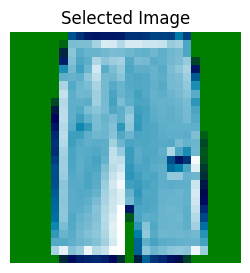

1/1 [==============================] - 0s 40ms/step


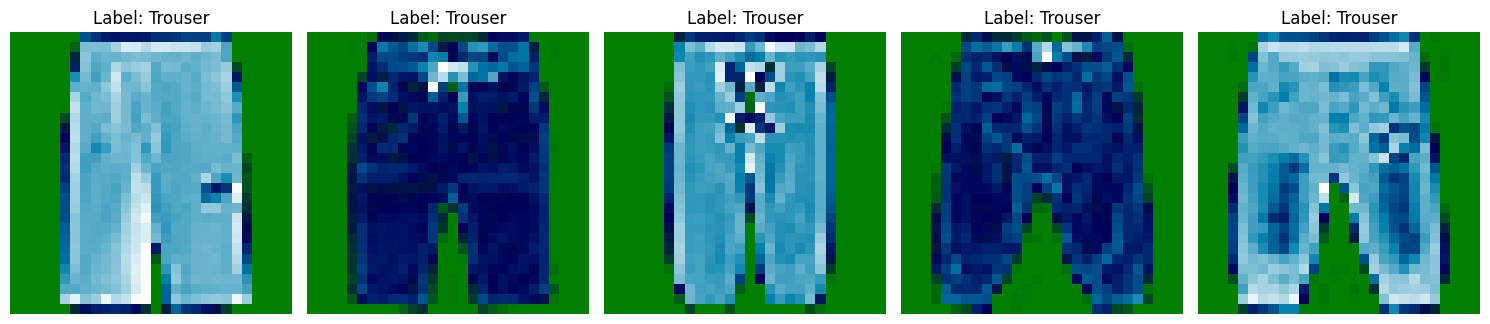

In [ ]:
# Manually setting the image index:
image_index = 9999
# Display recommendations for the selected image index:
display_recommendations(image_index)